In [1]:

import os
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from pprint import pprint
from sklearn.model_selection import GridSearchCV    
from collections import Counter 

%matplotlib inline


In [2]:
os.chdir('D:\Trim 5')
os.getcwd()

'D:\\Trim 5'

In [3]:
test = pd.read_csv('test.csv')

In [4]:
test.head(5)

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [5]:
train  = pd.read_csv("train.csv",na_values={"pickup_datetime":"43"})


In [6]:
train.head(5)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0


In [7]:
test.shape,train.shape

((9914, 6), (16067, 7))

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16067 entries, 0 to 16066
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fare_amount        16043 non-null  object 
 1   pickup_datetime    16066 non-null  object 
 2   pickup_longitude   16067 non-null  float64
 3   pickup_latitude    16067 non-null  float64
 4   dropoff_longitude  16067 non-null  float64
 5   dropoff_latitude   16067 non-null  float64
 6   passenger_count    16012 non-null  float64
dtypes: float64(5), object(2)
memory usage: 878.8+ KB


In [9]:
train.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,16067.000000,16067.000000,16067.000000,16067.000000,16012.000000
mean,-72.462787,39.914725,-72.462328,39.897906,2.625070
std,10.578384,6.826587,10.575062,6.187087,60.844122
min,-74.438233,-74.006893,-74.429332,-74.006377,0.000000
25%,-73.992156,40.734927,-73.991182,40.734651,1.000000
50%,-73.981698,40.752603,-73.980172,40.753567,1.000000
75%,-73.966838,40.767381,-73.963643,40.768013,2.000000
max,40.766125,401.083332,40.802437,41.366138,5345.000000


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pickup_datetime    9914 non-null   object 
 1   pickup_longitude   9914 non-null   float64
 2   pickup_latitude    9914 non-null   float64
 3   dropoff_longitude  9914 non-null   float64
 4   dropoff_latitude   9914 non-null   float64
 5   passenger_count    9914 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 464.8+ KB


In [11]:
test.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


In [12]:
train["fare_amount"] = pd.to_numeric(train["fare_amount"],errors = "coerce")

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16067 entries, 0 to 16066
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fare_amount        16042 non-null  float64
 1   pickup_datetime    16066 non-null  object 
 2   pickup_longitude   16067 non-null  float64
 3   pickup_latitude    16067 non-null  float64
 4   dropoff_longitude  16067 non-null  float64
 5   dropoff_latitude   16067 non-null  float64
 6   passenger_count    16012 non-null  float64
dtypes: float64(6), object(1)
memory usage: 878.8+ KB


In [15]:
train.dropna(subset= ["pickup_datetime"])   


,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0
...,...,...,...,...,...,...,...
16062,6.5,2014-12-12 07:41:00 UTC,-74.008820,40.718757,-73.998865,40.719987,1.0
16063,16.1,2009-07-13 07:58:00 UTC,-73.981310,40.781695,-74.014392,40.715527,2.0
16064,8.5,2009-11-11 11:19:07 UTC,-73.972507,40.753417,-73.979577,40.765495,1.0
16065,8.1,2010-05-11 23:53:00 UTC,-73.957027,40.765945,-73.981983,40.779560,1.0


In [16]:
train['fare_amount'].sort_values(ascending=False)

1015    54343.0
1072     4343.0
607       453.0
980       434.0
1335      180.0
         ...   
1712        NaN
2412        NaN
2458        NaN
8178        NaN
8226        NaN
Name: fare_amount, Length: 16067, dtype: float64

In [17]:
sum(train['fare_amount']==0)

1

In [18]:
sum(train['fare_amount']>500)

2

In [19]:
train=train.drop(train[train['fare_amount']<1].index,axis=0)

In [20]:
sum(train['fare_amount']==0)

0

In [21]:
train=train.drop(train[train['fare_amount']>500].index,axis=0)

In [22]:
sum(train['fare_amount']>500)

0

In [23]:
train[train['fare_amount'].isnull()]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
8,NaN,2012-12-03 13:10:00 UTC,-74.006462,40.726713,-73.993078,40.731628,1.0
26,NaN,2011-02-07 20:01:00 UTC,0.000000,0.000000,0.000000,0.000000,1.0
69,NaN,2015-05-12 23:51:42 UTC,-73.954796,40.779335,-73.944931,40.780087,1.0
126,NaN,2013-09-17 04:22:00 UTC,-73.987210,40.729325,-73.931985,40.697207,1.0
168,NaN,2009-01-16 21:10:00 UTC,-73.994143,40.751193,-73.988897,40.759742,1.0
240,NaN,2009-06-20 19:28:37 UTC,-73.979345,40.776630,-73.973842,40.757074,1.0
305,NaN,2014-07-11 05:07:00 UTC,-73.951660,40.772657,-74.010583,40.721405,2.0
350,NaN,2014-09-05 15:23:00 UTC,-73.968260,40.765140,-73.961115,40.774882,6.0
413,NaN,2013-09-12 11:32:00 UTC,-73.982060,40.772705,-73.956213,40.771777,55.0
455,NaN,2014-07-03 01:34:00 UTC,-73.968087,40.755140,-73.952622,40.823312,5.0


In [24]:
sum(train['fare_amount'].isnull())

25

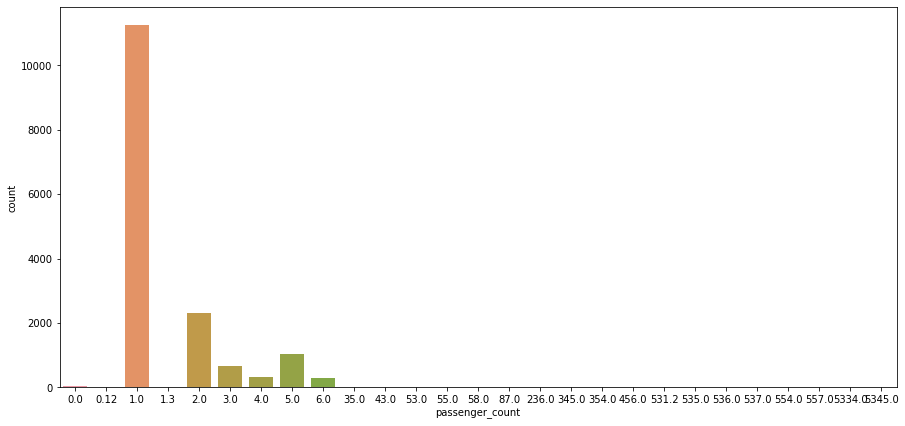

In [25]:
plt.figure(figsize=(15,7))
sns.countplot("passenger_count", data=train)


In [26]:
train["passenger_count"].sort_values(ascending= True)


8661     0.0
4248     0.0
3489     0.0
6575     0.0
13379    0.0
        ... 
8076     NaN
8139     NaN
8259     NaN
8306     NaN
16066    NaN
Name: passenger_count, Length: 16060, dtype: float64

In [27]:
sum(train['passenger_count']<1)

58

In [28]:
sum(train['passenger_count']>6)

20

In [29]:
train = train.drop(train[train['passenger_count']<1].index, axis=0)


In [30]:
train = train.drop(train[train['passenger_count']>6].index, axis=0)


In [31]:
sum(train['passenger_count']>6)

0

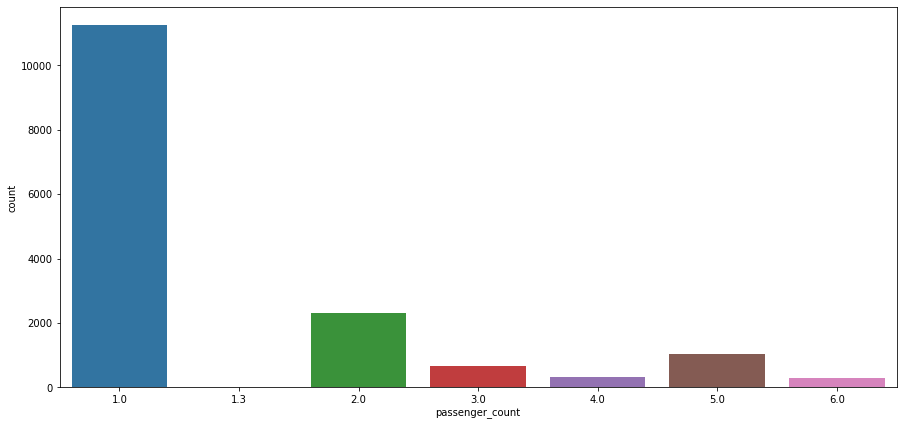

In [32]:
plt.figure(figsize=(15,7))
sns.countplot("passenger_count", data=train)
#plot after removing outliers


In [33]:
train.isnull().sum()

fare_amount          24
pickup_datetime       1
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
passenger_count      55
dtype: int64

In [34]:
sum(train['pickup_longitude']>180)
sum(train['pickup_longitude']<-180)

0

In [35]:
sum(train['pickup_longitude']>90)

0

In [36]:
sum(train['pickup_longitude']<-90)


0

In [37]:
for i in ['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']:
    print(i,'equal to 0={}'.format(sum(train[i]==0)))

pickup_longitude equal to 0=311
pickup_latitude equal to 0=311
dropoff_longitude equal to 0=312
dropoff_latitude equal to 0=310


In [38]:
train=train.drop(train[train['pickup_latitude']==0].index,axis=0)

In [39]:
train=train.drop(train[train['pickup_longitude']==0].index,axis=0)

In [40]:
train=train.drop(train[train['dropoff_longitude']==0].index,axis=0)

In [41]:
train=train.drop(train[train['dropoff_latitude']==0].index,axis=0)

In [42]:
for i in ['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']:
    print(i,'equal to 0={}'.format(sum(train[i]==0)))

pickup_longitude equal to 0=0
pickup_latitude equal to 0=0
dropoff_longitude equal to 0=0
dropoff_latitude equal to 0=0


In [43]:
train.shape

(15660, 7)

In [44]:
train.isnull().sum()


fare_amount          22
pickup_datetime       1
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
passenger_count      55
dtype: int64

In [45]:
#for category variables we impute with mode
train['passenger_count'] = train['passenger_count'].fillna(int(train['passenger_count'].mode()))

In [46]:
train = train.drop(train[train['fare_amount'].isnull()].index, axis=0)


In [47]:
train.isnull().sum()


fare_amount          0
pickup_datetime      1
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [48]:
train.shape


(15638, 7)

Text(0.5, 1.0, 'Histogram')

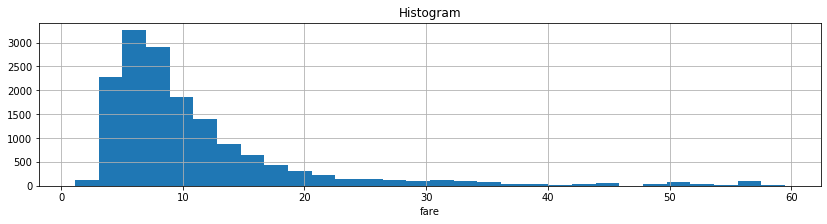

In [49]:
train[train['fare_amount']<60]['fare_amount'].hist(bins=30, figsize=(14,3))
plt.xlabel('fare')
plt.title('Histogram')

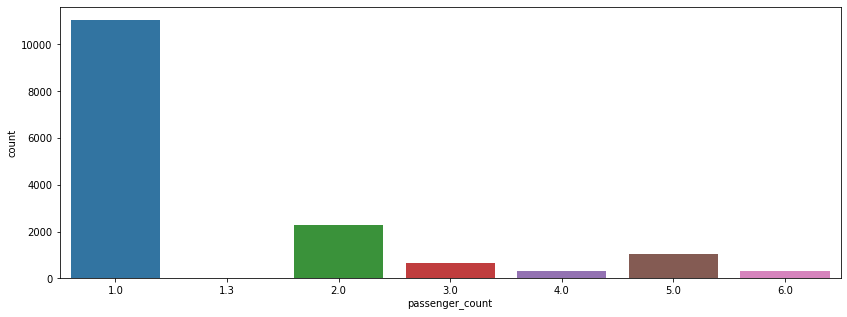

In [50]:
plt.figure(figsize=(14,5))
sns.countplot(x='passenger_count', data=train)


In [51]:
train.describe()


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,15638.000000,15638.000000,15638.000000,15638.000000,15638.000000,15638.000000
mean,11.366073,-73.911410,40.712655,-73.906224,40.687559,1.648120
std,10.784872,2.661004,3.891664,2.712827,2.634334,1.264228
min,1.140000,-74.438233,-74.006893,-74.429332,-74.006377,1.000000
25%,6.000000,-73.992390,40.736547,-73.991367,40.736303,1.000000
50%,8.500000,-73.982053,40.753299,-73.980563,40.754232,1.000000
75%,12.500000,-73.968075,40.767802,-73.965370,40.768311,2.000000
max,453.000000,40.766125,401.083332,40.802437,41.366138,6.000000


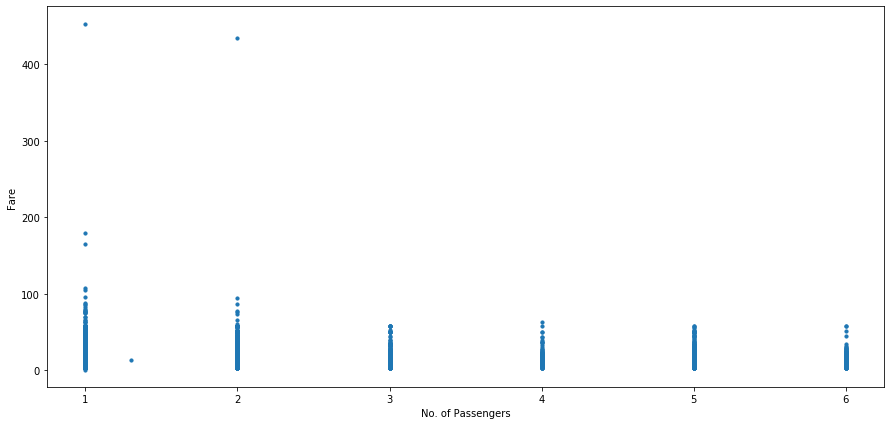

In [52]:
plt.figure(figsize=(15,7))
plt.scatter(x=train['passenger_count'], y=train['fare_amount'], s=10)
plt.xlabel('No. of Passengers')
plt.ylabel('Fare')
plt.show()


In [53]:
train.isnull().sum()


fare_amount          0
pickup_datetime      1
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [54]:
test.isnull().sum()


pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [55]:
train['pickup_datetime'] =  pd.to_datetime(train['pickup_datetime'], format='%Y-%m-%d %H:%M:%S UTC')

In [56]:

train['year'] = train['pickup_datetime'].dt.year
train['Month'] = train['pickup_datetime'].dt.month
train['Date'] = train['pickup_datetime'].dt.day
train['Day'] = train['pickup_datetime'].dt.dayofweek
train['Hour'] = train['pickup_datetime'].dt.hour
train['Minute'] = train['pickup_datetime'].dt.minute

In [57]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15638 entries, 0 to 16066
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   fare_amount        15638 non-null  float64       
 1   pickup_datetime    15637 non-null  datetime64[ns]
 2   pickup_longitude   15638 non-null  float64       
 3   pickup_latitude    15638 non-null  float64       
 4   dropoff_longitude  15638 non-null  float64       
 5   dropoff_latitude   15638 non-null  float64       
 6   passenger_count    15638 non-null  float64       
 7   year               15637 non-null  float64       
 8   Month              15637 non-null  float64       
 9   Date               15637 non-null  float64       
 10  Day                15637 non-null  float64       
 11  Hour               15637 non-null  float64       
 12  Minute             15637 non-null  float64       
dtypes: datetime64[ns](1), float64(12)
memory usage: 2.3 MB


In [58]:
test["pickup_datetime"] = pd.to_datetime(test["pickup_datetime"],format= "%Y-%m-%d %H:%M:%S UTC")


In [59]:
test['year'] = test['pickup_datetime'].dt.year
test['Month'] = test['pickup_datetime'].dt.month
test['Date'] = test['pickup_datetime'].dt.day
test['Day'] = test['pickup_datetime'].dt.dayofweek
test['Hour'] = test['pickup_datetime'].dt.hour
test['Minute'] = test['pickup_datetime'].dt.minute


In [60]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   pickup_datetime    9914 non-null   datetime64[ns]
 1   pickup_longitude   9914 non-null   float64       
 2   pickup_latitude    9914 non-null   float64       
 3   dropoff_longitude  9914 non-null   float64       
 4   dropoff_latitude   9914 non-null   float64       
 5   passenger_count    9914 non-null   int64         
 6   year               9914 non-null   int64         
 7   Month              9914 non-null   int64         
 8   Date               9914 non-null   int64         
 9   Day                9914 non-null   int64         
 10  Hour               9914 non-null   int64         
 11  Minute             9914 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(7)
memory usage: 929.6 KB


In [61]:
test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute
0,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,27,1,13,8
1,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,27,1,13,8
2,2011-10-08 11:53:44,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,8,5,11,53
3,2012-12-01 21:12:12,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,1,5,21,12
4,2012-12-01 21:12:12,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,1,5,21,12


In [62]:
train.head()


,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1.0,2009.0,6.0,15.0,0.0,17.0,26.0
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1.0,2010.0,1.0,5.0,1.0,16.0,52.0
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2.0,2011.0,8.0,18.0,3.0,0.0,35.0
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1.0,2012.0,4.0,21.0,5.0,4.0,30.0
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1.0,2010.0,3.0,9.0,1.0,7.0,51.0


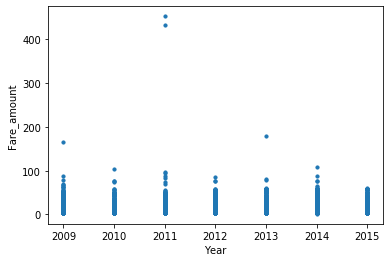

In [63]:
plt.scatter(x=train['year'], y=train['fare_amount'], s=10)
plt.xlabel('Year')
plt.ylabel('Fare_amount')
plt.show()


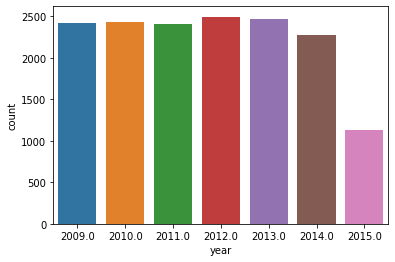

In [64]:
sns.countplot(train['year'])


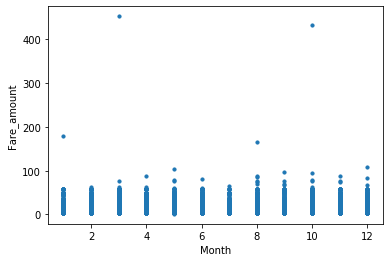

In [65]:
plt.scatter(x=train['Month'], y=train['fare_amount'], s=10)
plt.xlabel('Month')
plt.ylabel('Fare_amount')
plt.show()


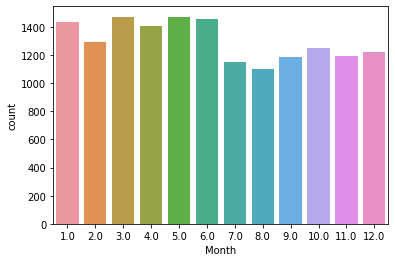

In [66]:
sns.countplot(train['Month'])


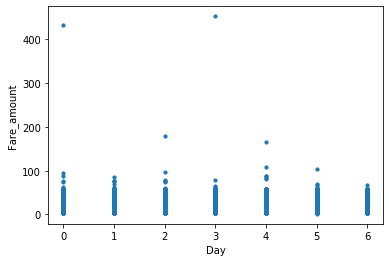

In [67]:
plt.scatter(x=train['Day'], y=train['fare_amount'], s=10)
plt.xlabel('Day')
plt.ylabel('Fare_amount')
plt.show()


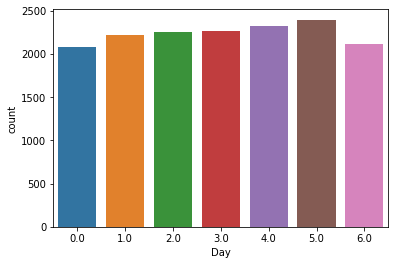

In [68]:
sns.countplot(train['Day'])


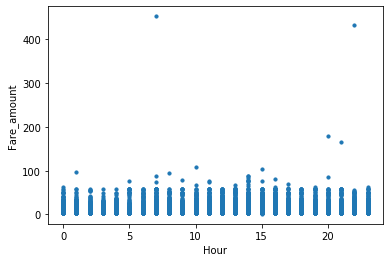

In [69]:
plt.scatter(x=train['Hour'], y=train['fare_amount'], s=10)
plt.xlabel('Hour')
plt.ylabel('Fare_amount')
plt.show()


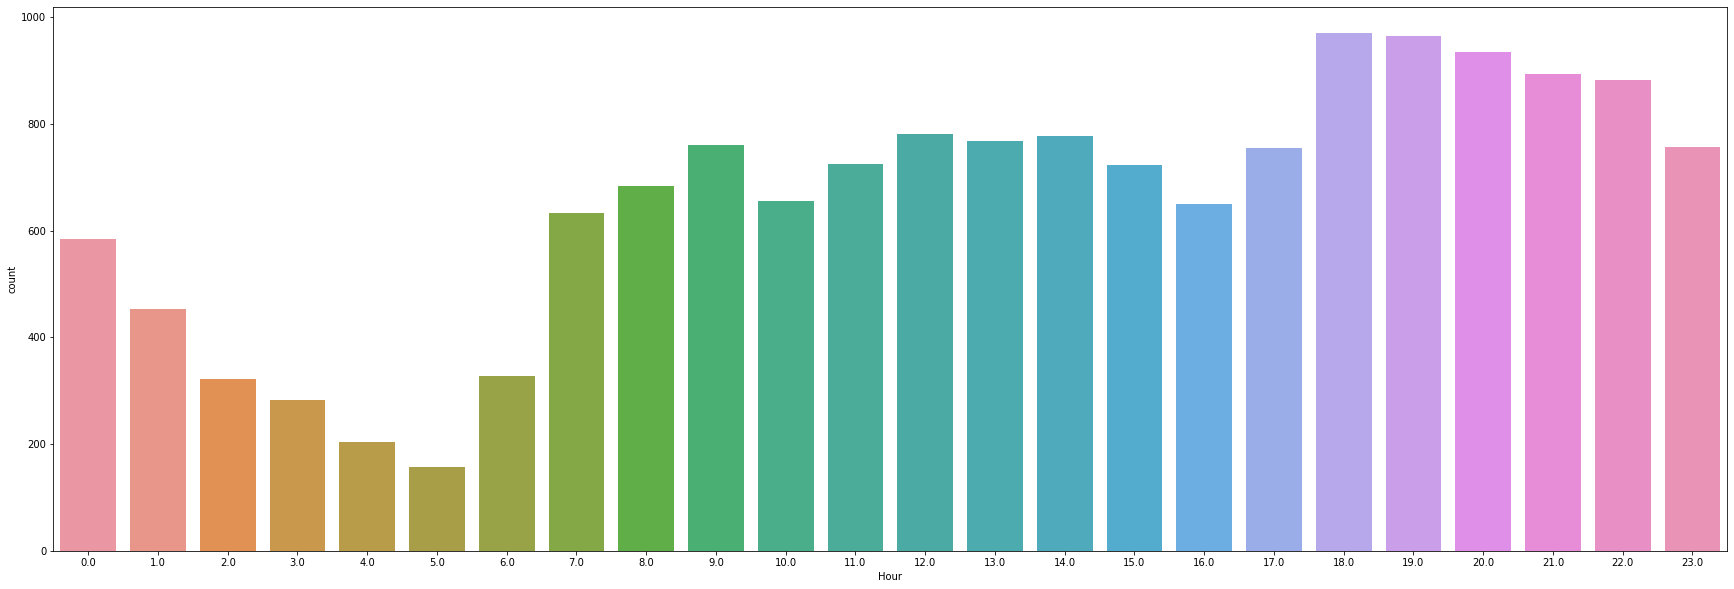

In [70]:
plt.figure(figsize=(30,10))

sns.countplot(train['Hour'])


# Calculating Distance

In [71]:
#As we know that we have given pickup longitute and latitude values and same for drop. 
#So we need to calculate the distance Using the haversine formula and we will create a new variable called distance
from math import radians, cos, sin, asin, sqrt

def haversine(a):
    lon1=a[0]
    lat1=a[1]
    lon2=a[2]
    lat2=a[3]
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c =  2 * asin(sqrt(a))
    # Radius of earth in kilometers is 6371
    km = 6371* c
    return km
# 1min

In [72]:
train['distance'] = train[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']].apply(haversine,axis=1)


In [74]:
test['distance'] = test[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']].apply(haversine,axis=1)


In [75]:
train.head()


,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute,distance
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1.0,2009.0,6.0,15.0,0.0,17.0,26.0,1.030764
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1.0,2010.0,1.0,5.0,1.0,16.0,52.0,8.450134
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2.0,2011.0,8.0,18.0,3.0,0.0,35.0,1.389525
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1.0,2012.0,4.0,21.0,5.0,4.0,30.0,2.799270
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1.0,2010.0,3.0,9.0,1.0,7.0,51.0,1.999157


In [76]:
test.head()


,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute,distance
0,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,27,1,13,8,2.323259
1,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,27,1,13,8,2.425353
2,2011-10-08 11:53:44,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,8,5,11,53,0.618628
3,2012-12-01 21:12:12,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,1,5,21,12,1.961033
4,2012-12-01 21:12:12,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,1,5,21,12,5.387301


In [77]:
train['distance'].sort_values(ascending=False)


5864     5420.988959
7014     4447.086698
10710     129.950482
14536     129.560455
11619     127.509261
            ...     
7929        0.000000
503         0.000000
7777        0.000000
14753       0.000000
2763        0.000000
Name: distance, Length: 15638, dtype: float64

In [78]:
sum(train['distance']>200)

2

In [79]:
train=train.drop(train[train['distance']>200].index,axis=0)

In [80]:

train = train.drop(train[train['distance'].isnull()].index, axis=0)


In [81]:
train = train.drop(train[train['distance']== 0].index, axis=0)
train.shape

(15481, 14)

In [82]:
print(train.isnull().sum())

fare_amount          0
pickup_datetime      1
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
year                 1
Month                1
Date                 1
Day                  1
Hour                 1
Minute               1
distance             0
dtype: int64


In [84]:
train = train.drop(train[train['pickup_datetime'].isnull()].index, axis=0)
train = train.drop(train[train['year'].isnull()].index, axis=0)
train = train.drop(train[train['Month'].isnull()].index, axis=0)
train = train.drop(train[train['Date'].isnull()].index, axis=0)
train = train.drop(train[train['Day'].isnull()].index, axis=0)
train = train.drop(train[train['Hour'].isnull()].index, axis=0)
train = train.drop(train[train['Minute'].isnull()].index, axis=0)



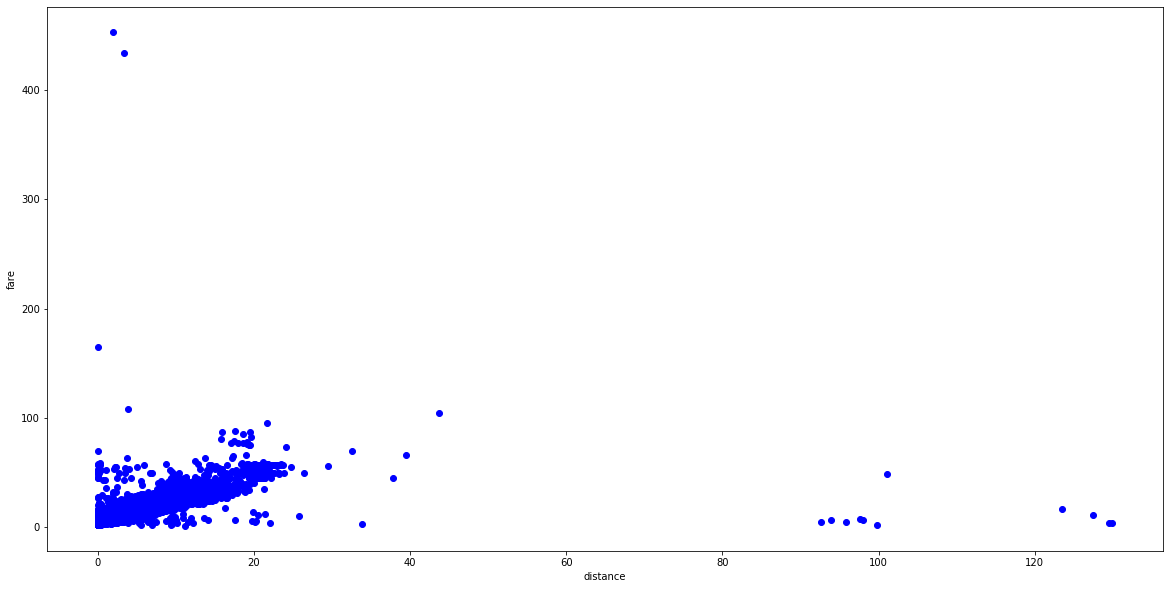

In [85]:
# realationship between fare and distance
plt.figure(figsize=(20,10))
plt.scatter(x="distance",y="fare_amount", data=train,color='blue')
plt.xlabel('distance')
plt.ylabel('fare')
plt.show()

fare_amount


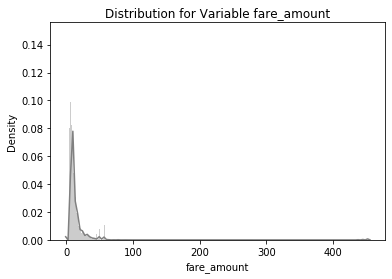

distance


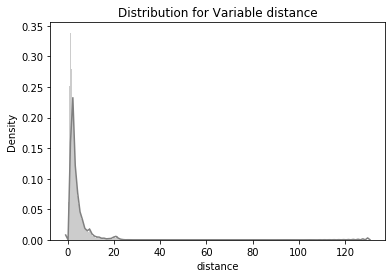

In [86]:
for i in ['fare_amount', 'distance']:
    print(i)
    sns.distplot(train[i],bins='auto',color='grey')
    plt.title("Distribution for Variable "+i)
    plt.ylabel("Density")
    plt.show()

In [87]:

#since skewness of target variable is high, apply log transform to reduce the skewness-
train['fare_amount'] = np.log1p(train['fare_amount'])

#since skewness of distance variable is high, apply log transform to reduce the skewness-
train['distance'] = np.log1p(train['distance'])

fare_amount


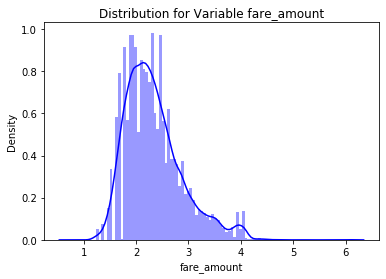

distance


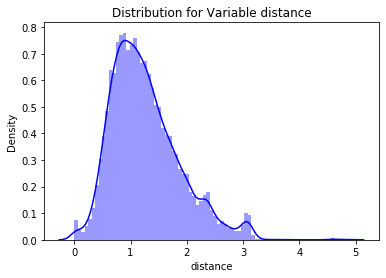

In [88]:

for i in ['fare_amount', 'distance']:
    print(i)
    sns.distplot(train[i],bins='auto',color='blue')
    plt.title("Distribution for Variable "+i)
    plt.ylabel("Density")
    plt.show()

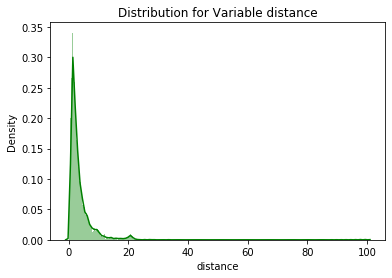

In [89]:
sns.distplot(test['distance'],bins='auto',color='green')
plt.title("Distribution for Variable "+i)
plt.ylabel("Density")
plt.show()

In [90]:
test['distance'] = np.log1p(test['distance'])


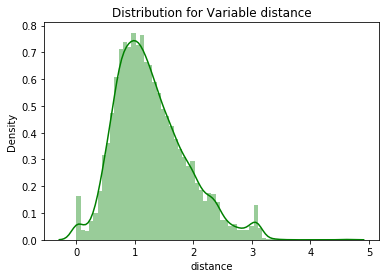

In [91]:
sns.distplot(test['distance'],bins='auto',color='green')
plt.title("Distribution for Variable "+i)
plt.ylabel("Density")
plt.show()

In [92]:
numerical_val=['fare_amount','Date','distance','Hour','Day','passenger_count','year']

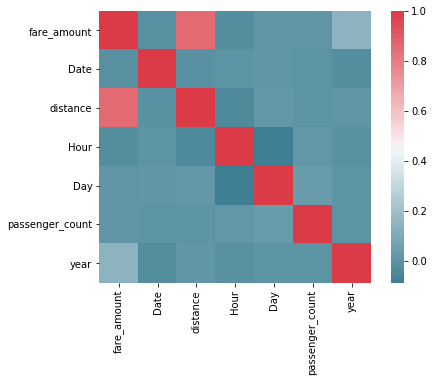

In [93]:
 #FEATURE SELECTION     #### FILTER METHOD ####    ## pearson correlation plot ##
train_corr=train.loc[:,numerical_val]
f, ax = plt.subplots(figsize=(7, 5))
correlation_matrix=train_corr.corr()
#correlation plot
sns.heatmap(correlation_matrix,mask=np.zeros_like(correlation_matrix,dtype=np.bool),cmap=sns.diverging_palette(220,10,as_cmap=True),square=True,ax=ax).get_figure().savefig('pythonheat_map.png')

In [95]:
drop = ['pickup_datetime', 'pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude', 'Minute']
train = train.drop(drop, axis = 1)

KeyError: "['pickup_datetime' 'pickup_longitude' 'pickup_latitude'\n 'dropoff_longitude' 'dropoff_latitude' 'Minute'] not found in axis"

In [96]:
train.head()

,fare_amount,passenger_count,year,Month,Date,Day,Hour,distance
0,1.704748,1.0,2009.0,6.0,15.0,0.0,17.0,0.708412
1,2.884801,1.0,2010.0,1.0,5.0,1.0,16.0,2.246029
2,1.902108,2.0,2011.0,8.0,18.0,3.0,0.0,0.871095
3,2.163323,1.0,2012.0,4.0,21.0,5.0,4.0,1.334809
4,1.840550,1.0,2010.0,3.0,9.0,1.0,7.0,1.098331


In [97]:
drop_test = ['pickup_datetime', 'pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude', 'Minute']
test = test.drop(drop_test, axis = 1)

In [98]:
test.head()

,passenger_count,year,Month,Date,Day,Hour,distance
0,1,2015,1,27,1,13,1.200946
1,1,2015,1,27,1,13,1.231205
2,1,2011,10,8,5,11,0.481579
3,1,2012,12,1,5,21,1.085538
4,1,2012,12,1,5,21,1.854312


In [99]:
X_train, X_test, y_train, y_test = train_test_split( train.iloc[:, train.columns != 'fare_amount'], 
                         train.iloc[:, 0], test_size = 0.20, random_state = 1)

In [100]:
print(X_train.shape)
print(X_test.shape)

(12384, 7)
(3096, 7)


# LR MODEL

In [128]:
LR = LinearRegression().fit(X_train , y_train)

In [130]:
train_LR = LR.predict(X_train)

In [132]:
test_LR = LR.predict(X_test)

In [133]:

RMSE_train_LR= np.sqrt(mean_squared_error(y_train, train_LR))

In [134]:
RMSE_test_LR = np.sqrt(mean_squared_error(y_test, test_LR))


In [135]:
print("RMSE train = "+str(RMSE_train_LR))
print("RMSE test= "+str(RMSE_test_LR))

RMSE train = 0.26816746434653366
RMSE test= 0.27815187390188756


In [136]:
from sklearn.metrics import r2_score
r2_score(y_train, train_LR)

0.7596180808714215

In [137]:
r2_score(y_test, test_LR)

0.7332622774404975

# DT Model

In [138]:
DT_tree = DecisionTreeRegressor(max_depth = 3).fit(X_train,y_train)

In [139]:
test_DT = DT_tree.predict(X_test)


In [140]:
train_DT = DT_tree.predict(X_train)



In [141]:
RMSE_train_DT = np.sqrt(mean_squared_error(y_train, train_DT))



In [142]:
RMSE_test_DT = np.sqrt(mean_squared_error(y_test, test_DT))

In [143]:
print("RMSE train= "+str(RMSE_train_DT))
print("RMSE test= "+str(RMSE_test_DT))


RMSE train= 0.2707816070175232
RMSE test= 0.2741369919733517


In [144]:
r2_score(y_train, train_DT)



0.7549086693585864

In [145]:
r2_score(y_test, test_DT)


0.7409069611979319

# RF Model

In [148]:
from sklearn.ensemble import RandomForestRegressor


In [149]:
RF = RandomForestRegressor(n_estimators = 120).fit(X_train,y_train)


In [151]:
train_RF = RF.predict(X_train)
test_RF = RF.predict(X_test)


In [152]:
RMSE_train_RF = np.sqrt(mean_squared_error(y_train, train_RF))


In [153]:
RMSE_test_RF = np.sqrt(mean_squared_error(y_test, test_RF))


In [156]:
print("RMSE train ="+str(RMSE_train_RF))
print("RMSE test  = "+str(RMSE_test_RF))


RMSE train =0.09465034160624065
RMSE test  = 0.2636956024687171


In [157]:
r2_score(y_train, train_RF)


0.9700543324750504

In [158]:
r2_score(y_test, test_RF)


0.76026787600133

# GB Model

In [159]:
from sklearn.ensemble import GradientBoostingRegressor


In [161]:
GB = GradientBoostingRegressor().fit(X_train, y_train)


In [166]:

train_GB = fit_GB.predict(X_train)
test_GB = fit_GB.predict(X_test)


In [167]:
RMSE_train_GB = np.sqrt(mean_squared_error(y_train, train_GB))


In [168]:
RMSE_test_GB = np.sqrt(mean_squared_error(y_test, test_GB))

In [169]:
print("RMSE train = "+str(RMSE_train_GB))
print("RMSE test = "+str(RMSE_test_GB))


RMSE train = 0.2248250540204826
RMSE test = 0.2521328811404986


In [170]:
r2_score(y_test, test_GB)

0.7808308457820455

In [171]:
r2_score(y_train, train_GB)


0.8310418911240498

# Random Search CV Hypertuning


In [173]:
from sklearn.model_selection import train_test_split,RandomizedSearchCV


# Random Search CV on Random Forest Model


In [174]:

RRF = RandomForestRegressor(random_state = 30)
n_estimator = list(range(1,20,2))
depth = list(range(1,100,2))

# Create the random grid
rand_grid = {'n_estimators': n_estimator,
               'max_depth': depth}

randomcv_rf = RandomizedSearchCV(RRF, param_distributions = rand_grid, n_iter = 5, cv = 5, random_state=30)
randomcv_rf = randomcv_rf.fit(X_train,y_train)
predictions_RRF = randomcv_rf.predict(X_test)

view_best_params_RRF = randomcv_rf.best_params_

best_model = randomcv_rf.best_estimator_

predictions_RRF = best_model.predict(X_test)

#R^2
RRF_r2 = r2_score(y_test, predictions_RRF)
#RMSE
RRF_rmse = np.sqrt(mean_squared_error(y_test,predictions_RRF))

print('Random Search CV Random Forest Regressor Model Performance:')
print('Best Parameters = ',view_best_params_RRF)
print('R-squared = {:0.2}.'.format(RRF_r2))
print('RMSE = ',RRF_rmse)

Random Search CV Random Forest Regressor Model Performance:
Best Parameters =  {'n_estimators': 19, 'max_depth': 85}
R-squared = 0.76.
RMSE =  0.2652165769933952


In [175]:
gb = GradientBoostingRegressor(random_state = 34)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(gb.get_params())


Parameters currently in use:

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': 34,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}


# Random Search CV on gradient boosting model


In [176]:

gb = GradientBoostingRegressor(random_state = 30)
n_estimator = list(range(1,20,2))
depth = list(range(1,100,2))

# Create the random grid
rand_grid = {'n_estimators': n_estimator,
               'max_depth': depth}

randomcv_gb = RandomizedSearchCV(gb, param_distributions = rand_grid, n_iter = 5, cv = 5, random_state=0)
randomcv_gb = randomcv_gb.fit(X_train,y_train)
predictions_gb = randomcv_gb.predict(X_test)

view_best_params_gb = randomcv_gb.best_params_

best_model = randomcv_gb.best_estimator_

predictions_gb = best_model.predict(X_test)

#R^2
gb_r2 = r2_score(y_test, predictions_gb)
#Calculating RMSE
gb_rmse = np.sqrt(mean_squared_error(y_test,predictions_gb))

print('Random Search CV Gradient Boosting Model Performance:')
print('Best Parameters = ',view_best_params_gb)
print('R-squared = {:0.2}.'.format(gb_r2))
print('RMSE = ', gb_rmse)


Random Search CV Gradient Boosting Model Performance:
Best Parameters =  {'n_estimators': 15, 'max_depth': 9}
R-squared = 0.73.
RMSE =  0.27847029069907303


# Grid Search CV on RM model


In [182]:
from sklearn.model_selection import GridSearchCV    
## Grid Search CV for random Forest model
regr = RandomForestRegressor(random_state = 30)
n_estimator = list(range(11,20,1))
depth = list(range(5,15,2))

# Create the grid
grid_search = {'n_estimators': n_estimator,
               'max_depth': depth}

## Grid Search Cross-Validation with 5 fold CV
gridcv_rf = GridSearchCV(regr, param_grid = grid_search, cv = 5)
gridcv_rf = gridcv_rf.fit(X_train,y_train)
view_best_params_GRF = gridcv_rf.best_params_

#Apply model on test data
predictions_GRF = gridcv_rf.predict(X_test)

#R^2
GRF_r2 = r2_score(y_test, predictions_GRF)
#Calculating RMSE
GRF_rmse = np.sqrt(mean_squared_error(y_test,predictions_GRF))

print('Grid Search CV Random Forest Regressor Model Performance:')
print('Best Parameters = ',view_best_params_GRF)
print('R-squared = {:0.2}.'.format(GRF_r2))
print('RMSE = ',(GRF_rmse))

Grid Search CV Random Forest Regressor Model Performance:
Best Parameters =  {'max_depth': 7, 'n_estimators': 19}
R-squared = 0.77.
RMSE =  0.2562924153815385


# Grid Search CV on gradient boosting model


In [177]:
gb = GradientBoostingRegressor(random_state = 30)
n_estimator = list(range(11,20,1))
depth = list(range(5,15,2))

grid_search = {'n_estimators': n_estimator,
               'max_depth': depth}

gridcv_gb = GridSearchCV(gb, param_grid = grid_search, cv = 5)
gridcv_gb = gridcv_gb.fit(X_train,y_train)
view_best_params_Ggb = gridcv_gb.best_params_

predictions_Ggb = gridcv_gb.predict(X_test)

#R^2
Ggb_r2 = r2_score(y_test, predictions_Ggb)
#Calculating RMSE
Ggb_rmse = np.sqrt(mean_squared_error(y_test,predictions_Ggb))

print('Grid Search CV Gradient Boosting regression Model Performance:')
print('Best Parameters = ',view_best_params_Ggb)
print('R-squared = {:0.2}.'.format(Ggb_r2))
print('RMSE = ',(Ggb_rmse))


Grid Search CV Gradient Boosting regression Model Performance:
Best Parameters =  {'max_depth': 5, 'n_estimators': 19}
R-squared = 0.76.
RMSE =  0.2630645743025085


# GB model

In [179]:
regr = GradientBoostingRegressor(random_state = 30)
n_estimator = list(range(11,20,1))
depth = list(range(5,15,2))

grid_search = {'n_estimators': n_estimator,
               'max_depth': depth}

gridcv_rf = GridSearchCV(regr, param_grid = grid_search, cv = 5)
gridcv_rf = gridcv_rf.fit(X_train,y_train)
view_best_params_GRF = gridcv_rf.best_params_

predictions_GRF_test_Df = gridcv_rf.predict(test)


# Prediction using GB model

In [190]:
predictions_GRF_test_Df


array([2.3702925 , 2.3702925 , 1.80262513, ..., 3.75007077, 3.06053046,
       2.03522636])

In [191]:
test.head()


,passenger_count,year,Month,Date,Day,Hour,distance
0,1,2015,1,27,1,13,1.200946
1,1,2015,1,27,1,13,1.231205
2,1,2011,10,8,5,11,0.481579
3,1,2012,12,1,5,21,1.085538
4,1,2012,12,1,5,21,1.854312


In [192]:
test.to_csv('test.csv')

In [195]:
 df=pd.read_csv(r"D:\Trim 5\ML\Supervised\test.csv")


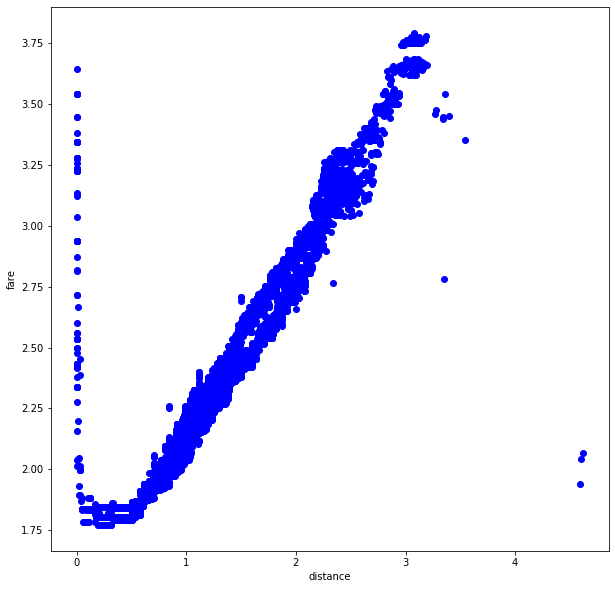

In [199]:
# realationship between fare and distance
plt.figure(figsize=(10,10))
plt.scatter(x="distance",y="Predicted_fare", data=df,color='blue')
plt.xlabel('distance')
plt.ylabel('fare')
plt.show()